In [ ]:
!pip install -q rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 42.8 MB/s eta 0:00:00


In [ ]:
# Biblitoecas
import numpy as np
import rasterio as rio
from rasterio.plot import reshape_as_image
import matplotlib.pyplot as plt
from skimage import io, color, feature
from skimage.util import img_as_ubyte
from skimage.feature import graycomatrix, graycoprops

In [ ]:
# Leitura da imagem
with rio.open('/content/drive/MyDrive/Curso PDI com Python/L71221071_07120010720_DN.tif') as src:
    imagem = reshape_as_image(src.read())

In [ ]:
# Cálculo do NDVI
ndvi = (imagem[:, :, 3] - imagem[:, :, 2]) / (imagem[:, :, 3] + imagem[:, :, 2])

(1233, 1520)

In [ ]:
#Função de expansão
def expansao(img, percent_ini=2, percent_fim=98):
    s = np.zeros_like(img)
    x,y = np.min(img),np.max(img)
    w = np.percentile(img, percent_ini)
    z = np.percentile(img, percent_fim)
    p = x + (img - w) * (y - x) / (z - w)
    p[p<x] = x
    p[p>y] = y
    s = p
    return s

In [ ]:

# Função para calcular atributos texturais
def calcular_atributos_texturais(janela, distancias=[1], angulos=[0]):

    if len(janela.shape) > 2:
        janela = color.rgb2gray(janela)

    janela = img_as_ubyte(janela)

    glcm = graycomatrix(janela, distances=distancias, angles=angulos, symmetric=True, normed=True)

    # Atributos texturais
    contraste = graycoprops(glcm, 'contrast')[0, 0]
    energia = graycoprops(glcm, 'energy')[0, 0]
    homogeneidade = graycoprops(glcm, 'homogeneity')[0, 0]
    correlacao = graycoprops(glcm, 'correlation')[0, 0]

    return contraste, energia, homogeneidade, correlacao

# Função para aplicar o processo em janelas móveis
def processar_imagem_janelas(imagem, tamanho_janela):

    altura, largura = imagem.shape

    contraste_img = np.zeros_like(imagem)
    energia_img = np.zeros_like(imagem)
    homogeneidade_img = np.zeros_like(imagem)
    correlacao_img = np.zeros_like(imagem)

    deslocamento = tamanho_janela // 2

    # Itera sobre a imagem com janelas móveis
    for i in range(deslocamento, altura - deslocamento):
        for j in range(deslocamento, largura - deslocamento):

            janela = imagem[i-deslocamento:i+deslocamento+1, j-deslocamento:j+deslocamento+1]

            # Calcula os atributos texturais para a janela
            contraste, energia, homogeneidade, correlacao = calcular_atributos_texturais(janela)

            contraste_img[i, j] = contraste
            energia_img[i, j] = energia
            homogeneidade_img[i, j] = homogeneidade
            correlacao_img[i, j] = correlacao

    return contraste_img, energia_img, homogeneidade_img, correlacao_img

In [ ]:
# Aplicando método
tamanho_janela = 7

contraste_img, energia_img, homogeneidade_img, correlacao_img = processar_imagem_janelas(ndvi, tamanho_janela)

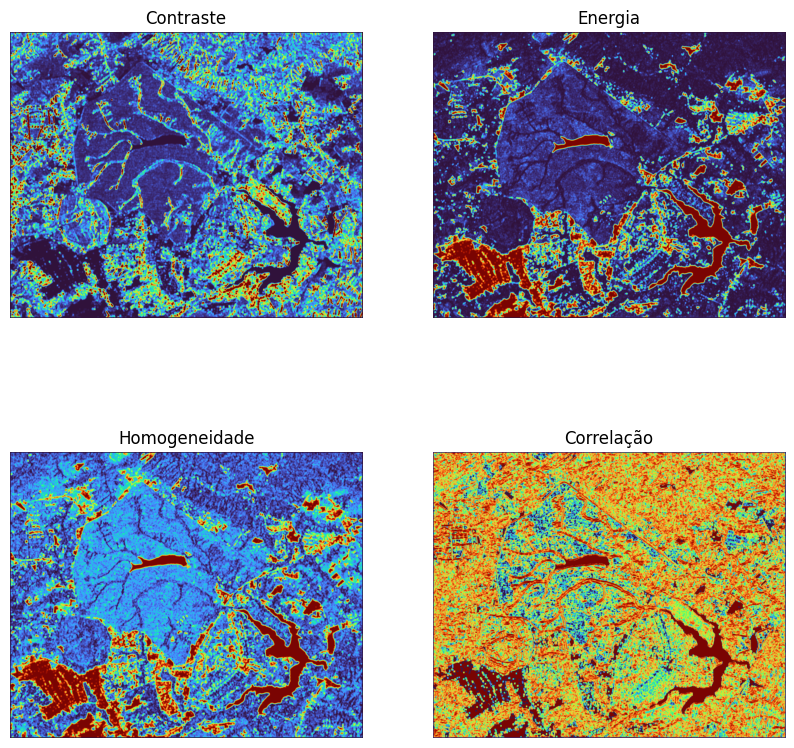

In [ ]:
# Visualização
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(expansao(contraste_img), cmap='turbo')
ax[0, 0].set_title('Contraste')
ax[0, 0].axis('off')

ax[0, 1].imshow(expansao(energia_img), cmap='turbo')
ax[0, 1].set_title('Energia')
ax[0, 1].axis('off')

ax[1, 0].imshow(expansao(homogeneidade_img), cmap='turbo')
ax[1, 0].set_title('Homogeneidade')
ax[1, 0].axis('off')

ax[1, 1].imshow(expansao(correlacao_img), cmap='turbo')
ax[1, 1].set_title('Correlação')
ax[1, 1].axis('off')

plt.show()